[*********************100%%**********************]  1 of 1 completed


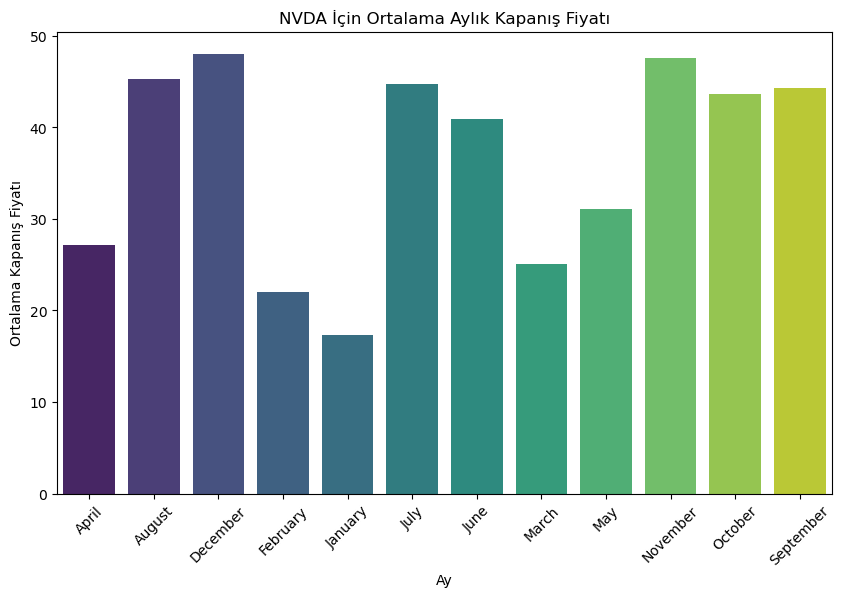

In [1]:
import tkinter as tk
from tkinter import messagebox
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Grafik oluşturma fonksiyonu
def create_graph(ticker, start_date, end_date):
    try:
        # Veriyi indirme
        data = yf.download(ticker, start=start_date, end=end_date)
        data.reset_index(inplace=True)
        
        # Her ayın ortalama kapanış fiyatını hesaplama
        data['Month'] = data['Date'].dt.strftime('%B')
        monthly_close = data.groupby('Month')['Close'].mean()
        
        # Çubuk grafiği oluşturma
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x=monthly_close.index, y=monthly_close.values, palette='viridis', ax=ax)
        ax.set_title(f'{ticker} İçin Ortalama Aylık Kapanış Fiyatı')
        ax.set_xlabel('Ay')
        ax.set_ylabel('Ortalama Kapanış Fiyatı')
        plt.xticks(rotation=45)
        
        # Önceki grafiği temizleme
        for widget in canvas_frame.winfo_children():
            widget.destroy()

        # Grafiği Tkinter'a entegre etme
        canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)
    except Exception as e:
        messagebox.showerror("Hata", str(e))

# Kullanıcı arayüzü fonksiyonu
def generate_graph():
    ticker = ticker_entry.get()
    start_date = start_date_entry.get()
    end_date = end_date_entry.get()
    
    if not ticker or not start_date or not end_date:
        messagebox.showwarning("Girdi Hatası", "Lütfen tüm alanları doldurun.")
    else:
        create_graph(ticker, start_date, end_date)

# GUI Başlatma
window = tk.Tk()
window.title("Hisse Senedi Veri Görselleştiricisi")

# Başlık etiketi
tk.Label(window, text="Hisse Senedi Veri Görselleştiricisi", font=("Helvetica", 16)).pack(pady=10)

# Kullanıcıdan tarih ve hisse senedi ismini alma
frame = tk.Frame(window)
frame.pack(pady=10)

tk.Label(frame, text="Hisse Simgesi:").grid(row=0, column=0, padx=5)
ticker_entry = tk.Entry(frame)
ticker_entry.grid(row=0, column=1, padx=5)

tk.Label(frame, text="Başlangıç Tarihi (YYYY-AA-GG):").grid(row=1, column=0, padx=5)
start_date_entry = tk.Entry(frame)
start_date_entry.grid(row=1, column=1, padx=5)

tk.Label(frame, text="Bitiş Tarihi (YYYY-AA-GG):").grid(row=2, column=0, padx=5)
end_date_entry = tk.Entry(frame)
end_date_entry.grid(row=2, column=1, padx=5)

# Grafik oluşturma butonu
generate_button = tk.Button(window, text="Grafik Oluştur", command=generate_graph)
generate_button.pack(pady=20)

# Grafik alanı
canvas_frame = tk.Frame(window)
canvas_frame.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

window.mainloop()